# Step 1: Install and import modules

In [2]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Image loading and text recognition using EasyOCR

In [22]:
im_1_path = './images/1_tshirt.jpg'
im_2_path = './images/2_tshirt.jpg'
im_3_path = './images/3_tshirt.jpg'
im_4_path = './images/4_tshirt.jpg'


# Step 3: Overlay recognized text on image using OpenCV

In [23]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: Graphic (Probability: 0.65)
Detected text: Designer (Probability: 1.00)


<Figure size 640x480 with 0 Axes>

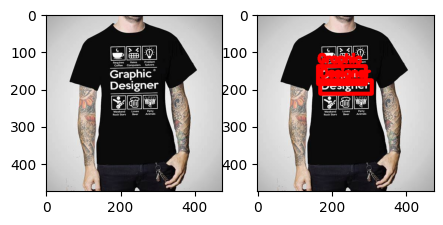

In [21]:
overlay_ocr_text(im_1_path, '1_tshirt')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: DO (Probability: 0.90179)
Detected text: WHATEVER (Probability: 0.99438)
Detected text: TAKES (Probability: 0.99989)


<Figure size 640x480 with 0 Axes>

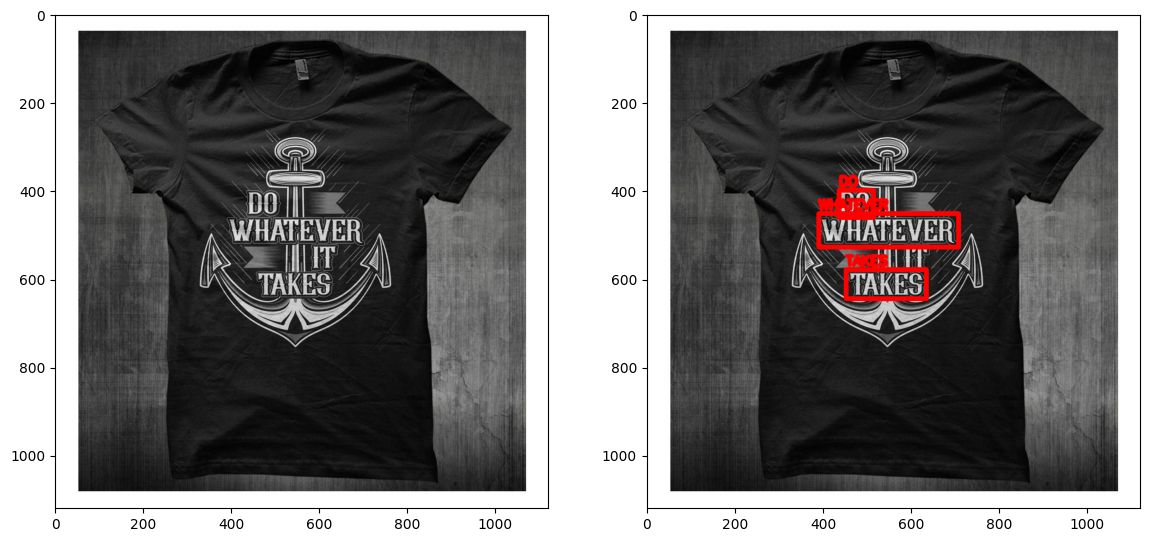

In [14]:
overlay_ocr_text(im_2_path, '2_tshirt')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: Early (Probability: 0.95181)
Detected text: Biras (Probability: 0.52912)


<Figure size 640x480 with 0 Axes>

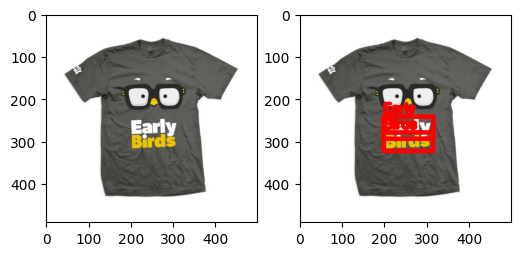

In [16]:
overlay_ocr_text(im_3_path, '3_tshirt')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: NOT A (Probability: 0.62276)
Detected text: Tourist (Probability: 0.57171)
Detected text: HERE (Probability: 0.95641)


<Figure size 640x480 with 0 Axes>

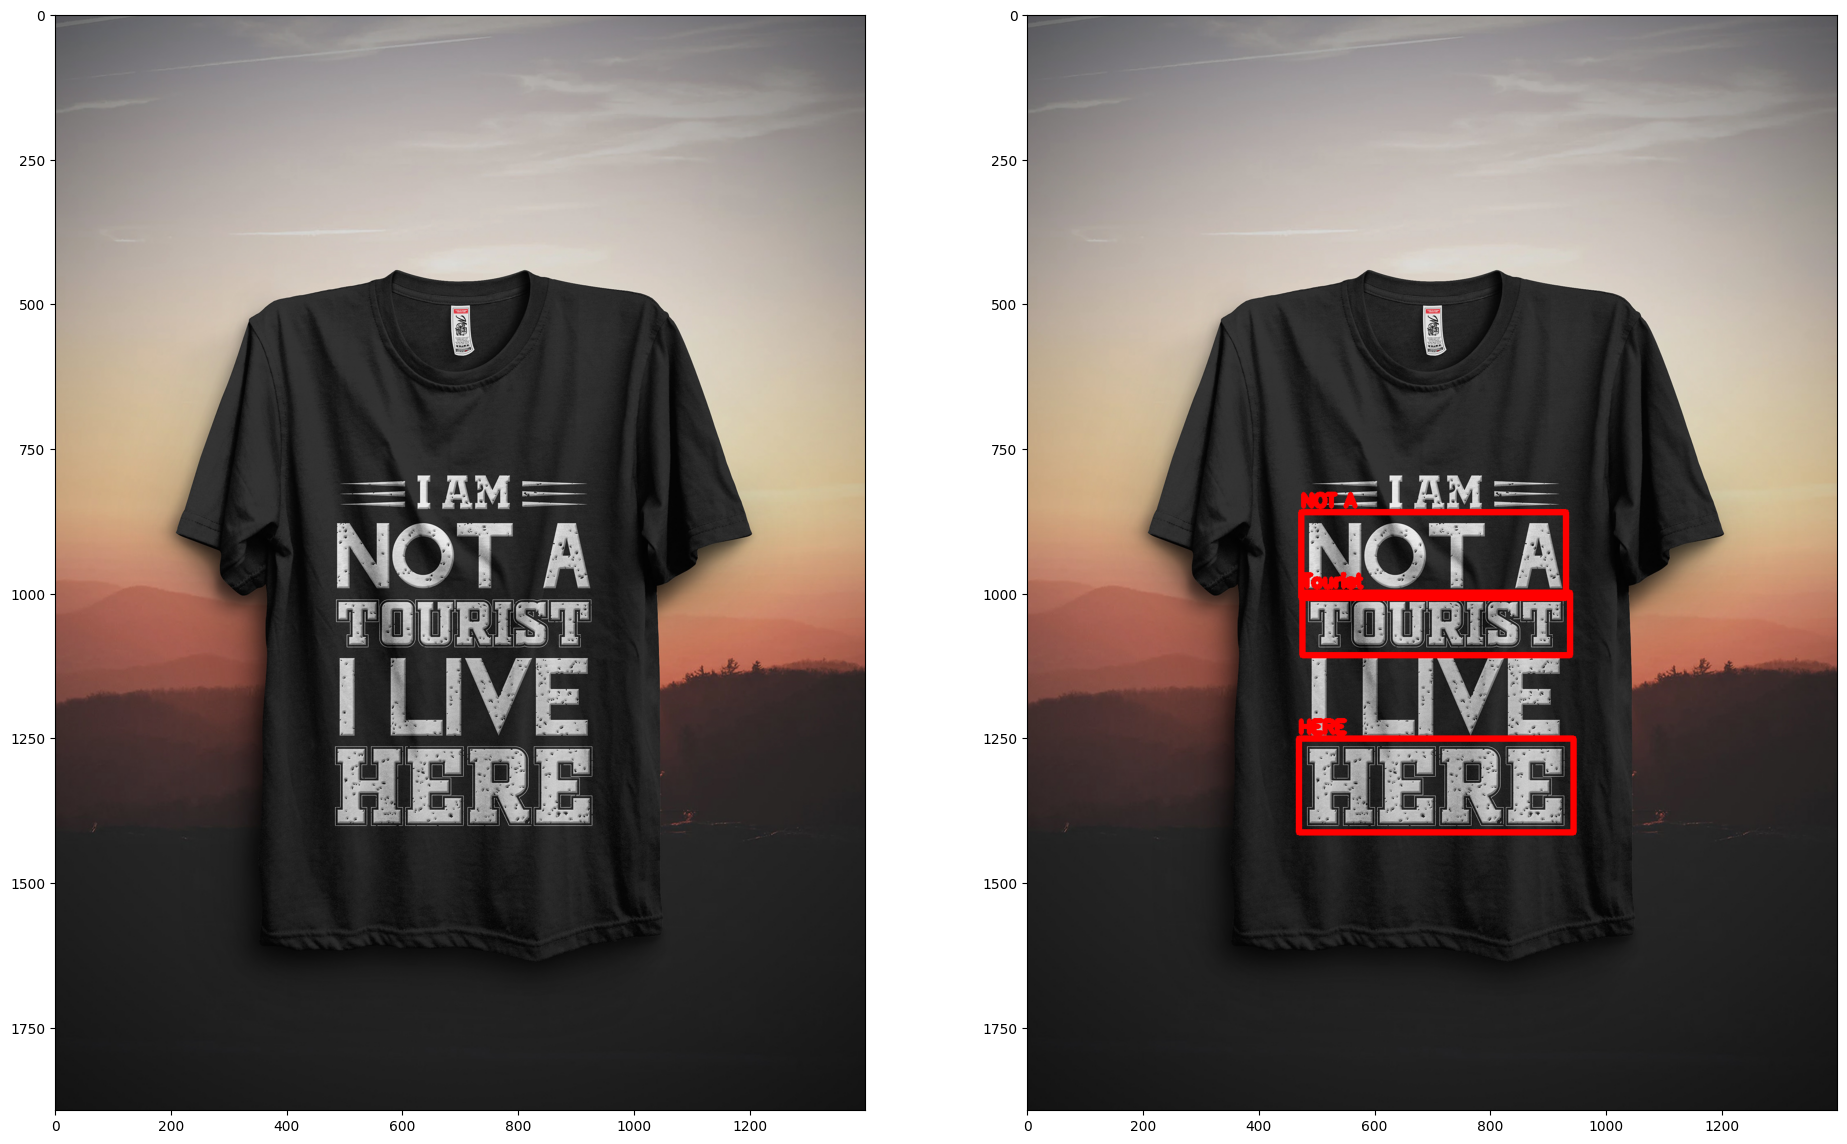

In [17]:
overlay_ocr_text(im_4_path, '4_tshirt')